<a href="https://colab.research.google.com/github/YoshiakiAsahara/for-intern/blob/main/%E9%9B%86%E8%A8%88%E5%8F%AF%E8%A6%96%E5%8C%96%E3%82%B9%E3%82%AD%E3%83%AB%E3%83%81%E3%82%A7%E3%83%83%E3%82%AF_%E5%95%8F%E9%A1%8C_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## データ準備

In [2]:
# %pip install japanize_matplotlib

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
#import japanize_matplotlib
taxis_df = sns.load_dataset("taxis", dtype="str")
taxis_df = taxis_df.drop(columns=["total", "color", "pickup_zone", "dropoff_zone", "tip", "tolls", "pickup_borough", "dropoff_borough", "dropoff", "payment"])

## 問1．データ確認
「taxis_df」というデータフレームが用意されています。</br>
下記項目を全て確認してください。
必要があればデータの型に関しては変更を加えて構いません。
- データフレームの行と列の数
- 各種カラムの型
- 各種要約統計量

In [29]:
df = taxis_df.copy()
print('行と列の数', df.shape)
print('カラムの方', df.dtypes)
df = df.astype({'passengers':float,
           'distance':float,
           'fare':float})
print(df['pickup'].describe())
df[['passengers', 'distance', 'fare']].describe()

行と列の数 (6433, 4)
カラムの方 pickup        datetime64[ns]
passengers            object
distance              object
fare                  object
dtype: object
count                             6433
mean     2019-03-16 08:31:28.514223616
min                2019-02-28 23:29:03
25%                2019-03-08 15:50:34
50%                2019-03-15 21:46:58
75%                2019-03-23 17:41:38
max                2019-03-31 23:43:45
Name: pickup, dtype: object


,passengers,distance,fare
count,6433.000000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073
std,1.203768,3.827867,11.551804
min,0.000000,0.000000,1.000000
25%,1.000000,0.980000,6.500000
50%,1.000000,1.640000,9.500000
75%,2.000000,3.210000,15.000000
max,6.000000,36.700000,150.000000


In [30]:
df.head()

,pickup,passengers,distance,fare
0,2019-03-23 20:21:09,1.0,1.60,7.0
1,2019-03-04 16:11:55,1.0,0.79,5.0
2,2019-03-27 17:53:01,1.0,1.37,7.5
3,2019-03-10 01:23:59,1.0,7.70,27.0
4,2019-03-30 13:27:42,3.0,2.16,9.0


## 問2．走行距離（distance）の分布と乗車代金（fare）の分布をそれぞれ表示してください
※2つのグラフを作成してください</br>
※タイトル、ラベルは作成不要です

In [36]:
result1 = df.groupby('distance').passengers.sum().reset_index()
result2 = df.groupby('fare').passengers.sum().reset_index()

<BarContainer object of 1079 artists>

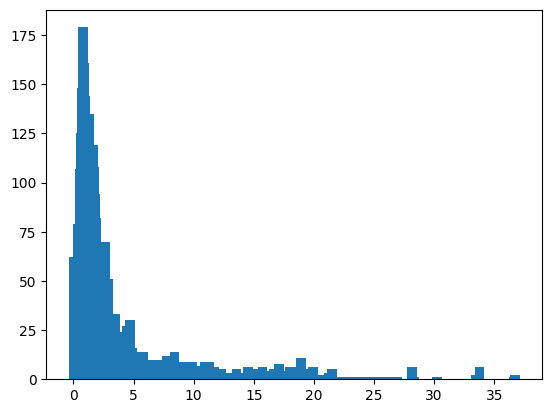

In [35]:
plt.bar(result1['distance'], result1['passengers'])

<BarContainer object of 220 artists>

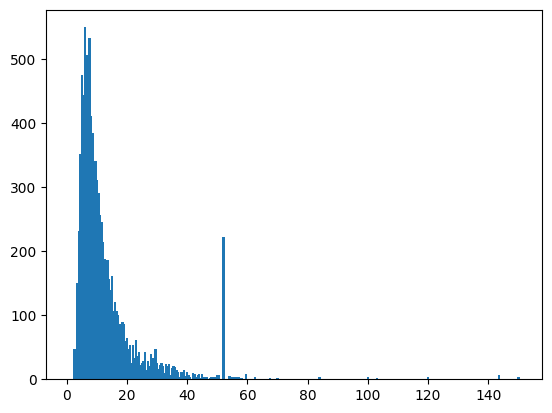

In [37]:
plt.bar(result2['fare'], result2['passengers'])

## 問3．時間帯別の乗車人数を可視化してください。
※時間帯の区切りはpickup（乗車時間）カラムを使用して12時を境に午前午後に変換すること</br>
※タイトル、ラベルは作成不要です

<BarContainer object of 2 artists>

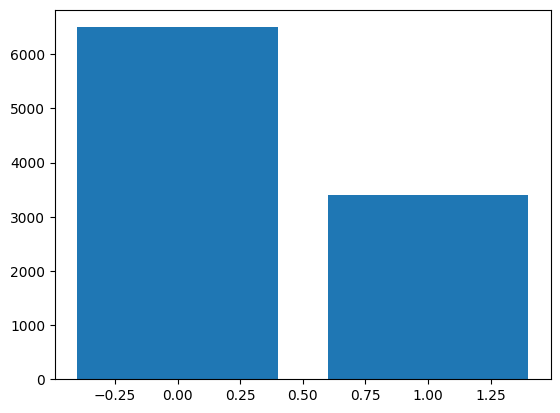

In [61]:
df['hour'] = df['pickup'].astype('str').str[11:13]
df['am'] = df['hour'].astype('int') <12
result3 = df.groupby('am').passengers.sum().reset_index()
plt.bar(result3['am'], result3['passengers'])